# Exercises

These exercises are a mix of Python and pandas/EDA practice. Most should be no more than a few lines of code! 

In [2]:
# here is a Python list:

a = [1, 2, 3, 4, 5, 6]

# get a list containing the last 3 elements of a
a_1 = a[:-3]
# reverse the list
a_2 = a[::]
# get a list where each entry in a is squared (so the new list is [1, 4, 9, 16, 25, 36])
a_3 = [x**2 for x in a]
print(a_1)
print(a_2)
print(a_3)

[1, 2, 3]
[1, 2, 3, 4, 5, 6]
[1, 4, 9, 16, 25, 36]


In [3]:
# create a numpy array from this list
import numpy as np
b = np.array(a) # change this
print(b)

[1 2 3 4 5 6]


In [4]:
# find the mean of b
print(b.mean())

3.5


In [5]:
# get a list where each entry in b is squared (so the new numpy array is [1, 4, 9, 16, 25, 36])
# use a different (numpy-specific) approach
print(b**2)

[ 1  4  9 16 25 36]


In [6]:
# change b from a length-6 list to a 2x3 matrix
b = b.reshape(2,3)
b

array([[1, 2, 3],
       [4, 5, 6]])

In [7]:
# find the mean value of each row
b.mean(axis = 1)

array([2., 5.])

In [8]:
# find the mean value of each column
b.mean(axis = 0)

array([2.5, 3.5, 4.5])

In [9]:
# find the third column of b
b[:,2]

array([3, 6])

In [11]:
# load in the "starbucks_clean.csv" dataset
import pandas as pd
df = pd.read_csv("../tutorial1/starbucks_clean.csv")
df.head()

,beveragecategory,beverage,beverageprep,calories,totalfatg,transfatg,saturatedfatg,sodiummg,totalcarbohydratesg,cholesterolmg,dietaryfibreg,sugarsg,proteing,vitaminadv,vitamincdv,calciumdv,irondv,caffeinemg
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0,0,0,0.0,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0,0,0,0.0,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,0,0.0,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,2,0.0,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10,0,20,0.0,75


In [12]:
# this is nutritional info for starbucks items
# let's see if we can answer some questions

# what is the average # calories across all items?
df['calories'].mean()

198.34913793103448

In [13]:
# how many different categories of beverages are there?
len(df['beverage'].unique())

31

In [16]:
# what is the average # calories for each beverage category?
bev = df.groupby('beverage')
bev['calories'].mean()

beverage
Banana Chocolate Smoothie                          295.000000
Brewed Coffee                                        4.250000
Caffè Americano                                     13.750000
Caffè Latte                                        139.166667
Caffè Mocha (Without Whipped Cream)                210.000000
Cappuccino                                          90.000000
Caramel                                            150.000000
Caramel (Without Whipped Cream)                    268.888889
Caramel Apple Spice (Without Whipped Cream)        247.500000
Caramel Macchiato                                  184.166667
Coffee                                             210.000000
Espresso                                             7.500000
Hot Chocolate (Without Whipped Cream)              236.666667
Iced Brewed Coffee (With Classic Syrup)             93.333333
Iced Brewed Coffee (With Milk & Classic Syrup)     122.222222
Java Chip                                          220.000000

In [74]:
# what beverage preparation includes the most sugar on average?
bev['calories'].mean().max()
print("White Chocolate Mocha (Without Whipped Cream)")

White Chocolate Mocha (Without Whipped Cream)


In [18]:
# what is the average % daily value calcium content for each beverage?
bev['calciumdv'].mean()

beverage
Banana Chocolate Smoothie                          20.000000
Brewed Coffee                                       0.500000
Caffè Americano                                     1.500000
Caffè Latte                                        35.000000
Caffè Mocha (Without Whipped Cream)                30.000000
Cappuccino                                         22.500000
Caramel                                            11.000000
Caramel (Without Whipped Cream)                    12.000000
Caramel Apple Spice (Without Whipped Cream)         0.000000
Caramel Macchiato                                  28.333333
Coffee                                             12.333333
Espresso                                            0.000000
Hot Chocolate (Without Whipped Cream)              35.000000
Iced Brewed Coffee (With Classic Syrup)             0.000000
Iced Brewed Coffee (With Milk & Classic Syrup)      8.000000
Java Chip                                          11.666667
Java Chip (With

In [113]:
# It's bulking season. What drink should Naitian get so that he maximizes protein but minimizes calories?
# (you can use more than one line for this one)
# there are multiple valid approaches you can take for this (with different answers)
# I know that you want more calories for bulking season but whatever this is MDST, not Michigan Muscle Club okay
max_min = bev[["calories", "proteing"]].agg({"calories": "min", "proteing": "max"})
max_min['calories'].max()
(max_min['calories'].subtract(max_min['proteing'])).idxmax()
    

'Strawberry Banana Smoothie'

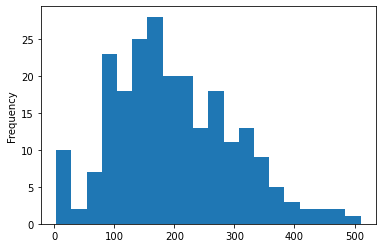

In [20]:
# plot the distribution of the number of calories in drinks using matplotlib
import matplotlib.pyplot as plt
df['calories'].plot.hist(bins=20)

0.10.1


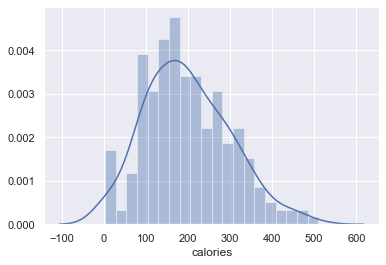

In [65]:
# plot the same distribution using seaborn. what about a density plot instead?
import seaborn as sns
print(sns.__version__)
sns.set()
#sns.distplot(df['calories'], bins=20)
sns.distplot(df['calories'], bins=20, kde=True)

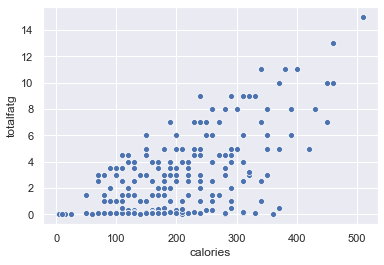

In [67]:
# plot calories against total fat using seaborn
#sns.jointplot(data=df, x="calories", y="totalfatg", kind="kde")
sns.scatterplot(data=df, x="calories", y="totalfatg")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff524b20cd0>,
      dtype=object)

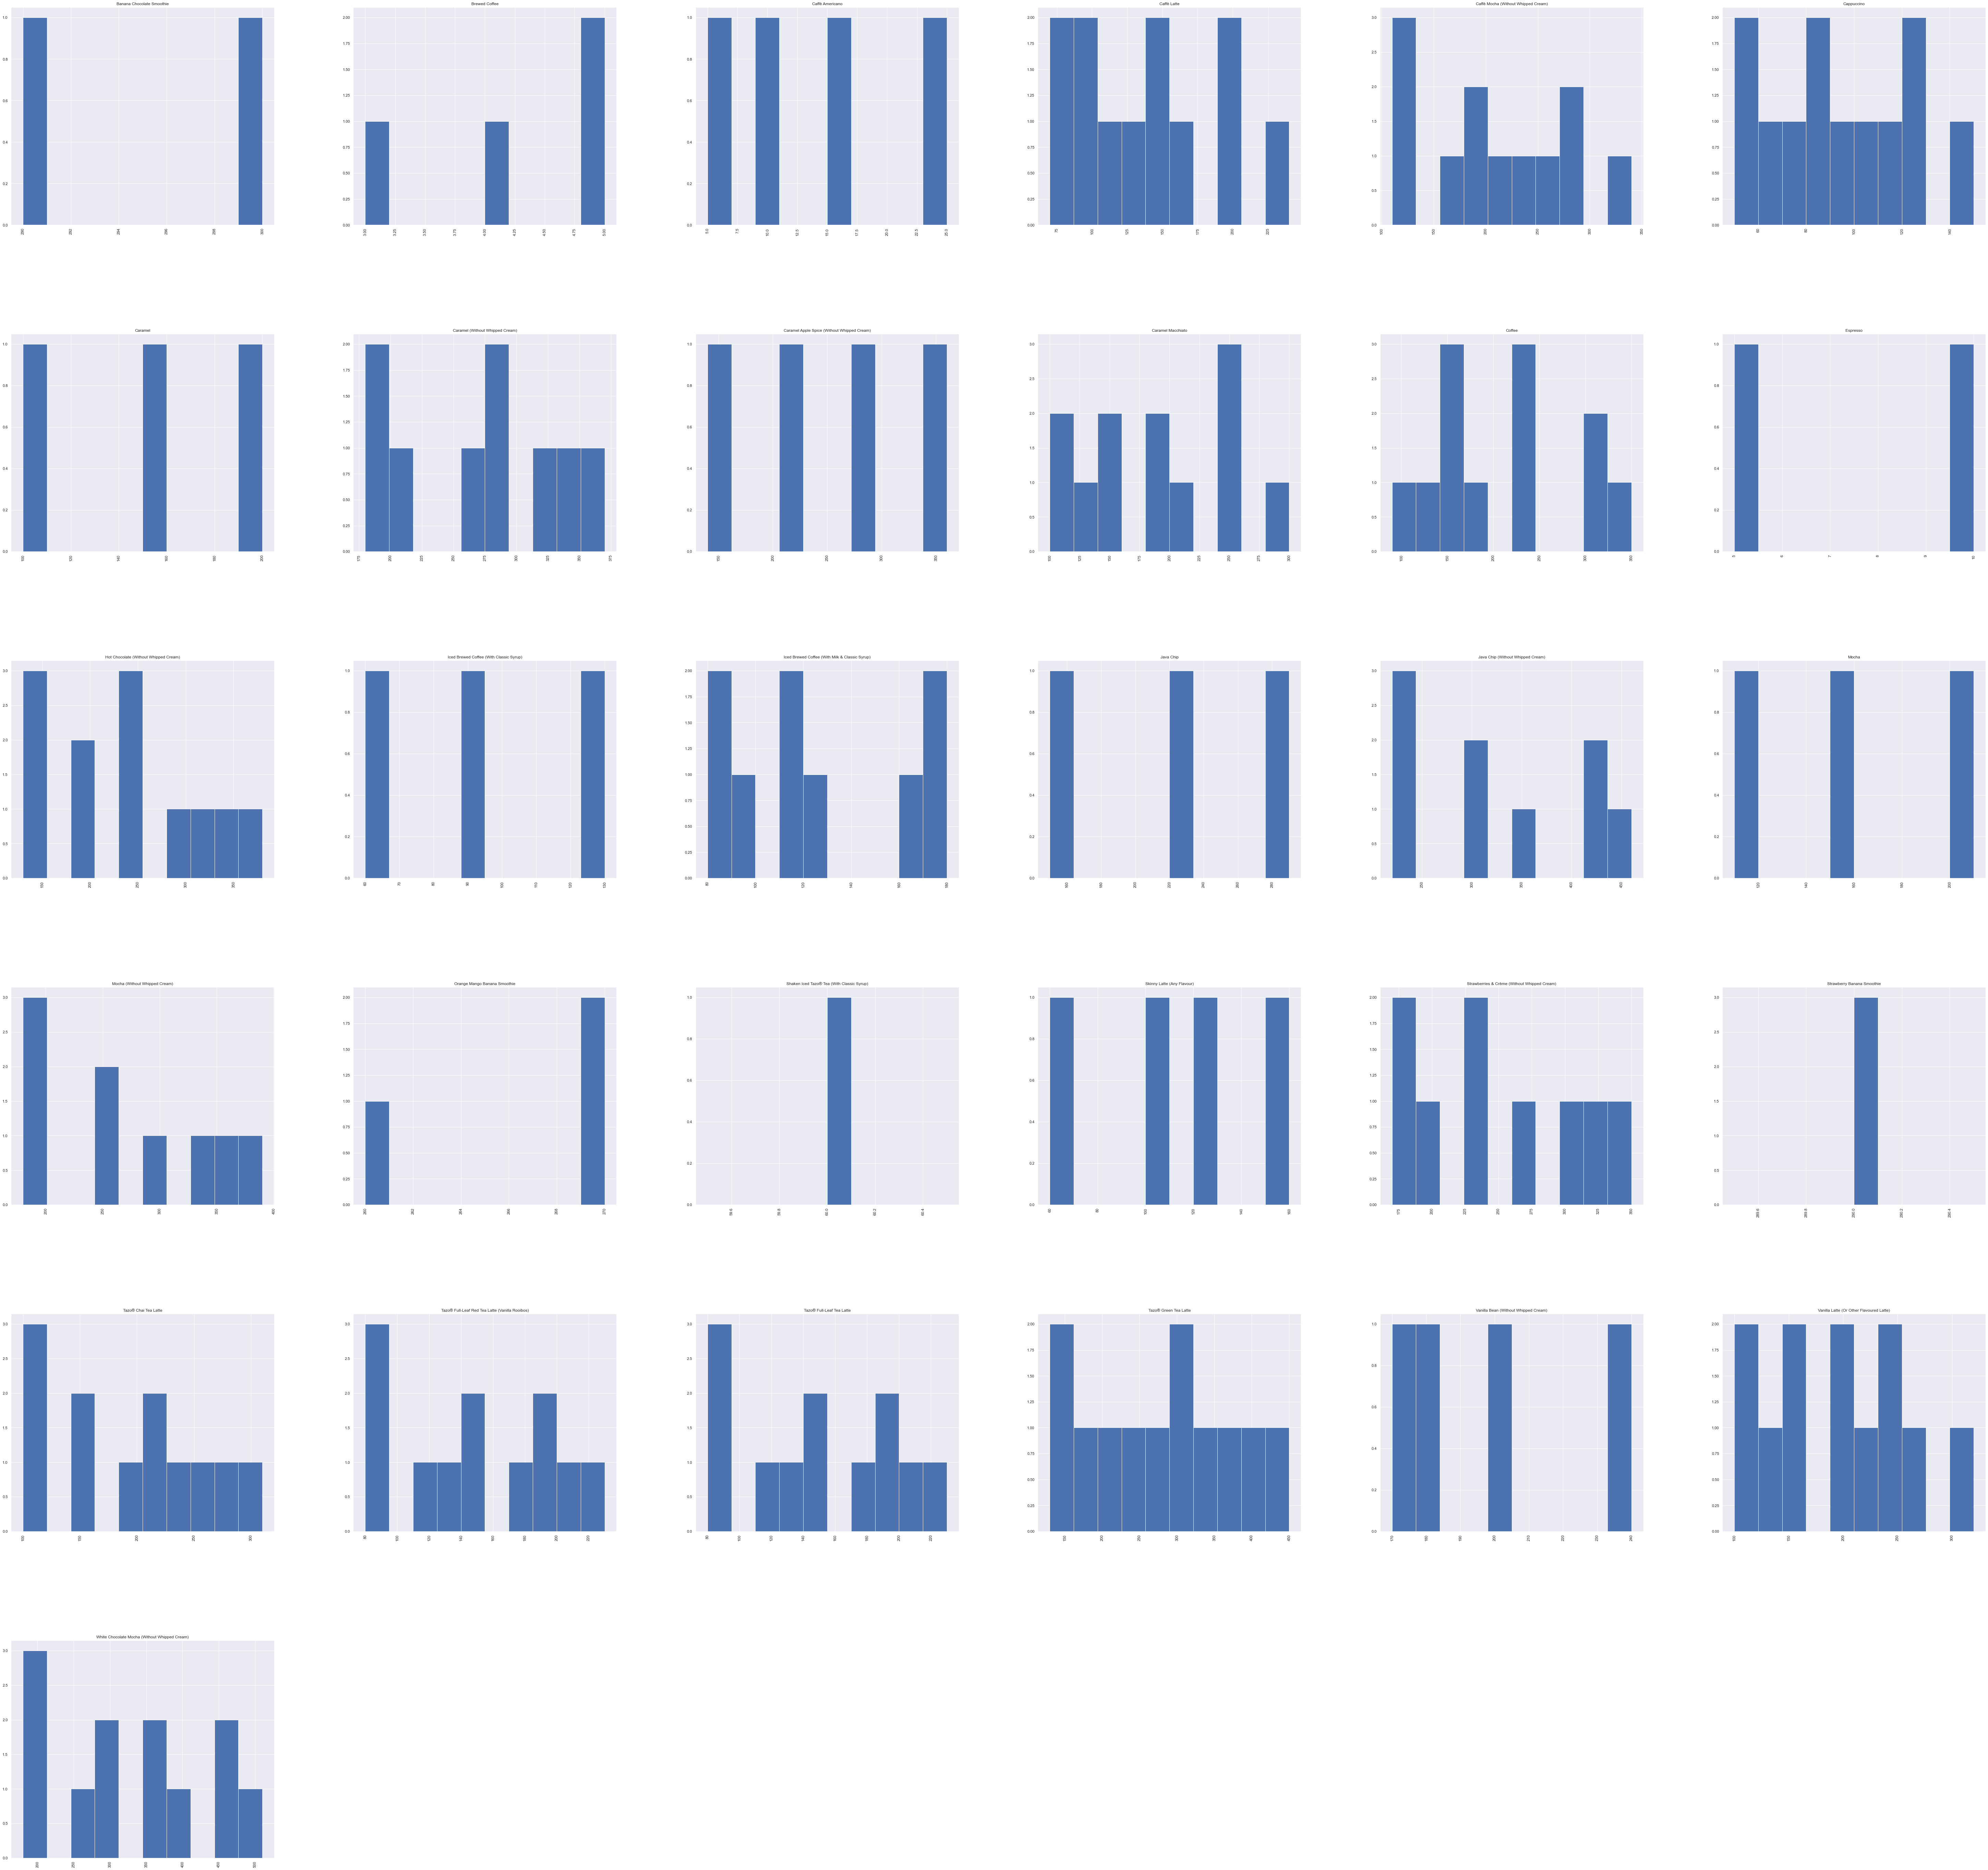

In [72]:
# plot the distribution of calories in Short, Tall, Grande, and Venti drinks
# (you can use multiple lines for this)
# twist: you should also include the Nonfat Milk drinks that also have an associated size.

# you can decide how you want to visualize this. Colors? Small multiples? Density vs histogram?
# the starbucks is your oyster.
df["calories"].hist(by=df["beverage"], figsize=(100, 100))
